In [20]:
# Power Transformation for Gaussian Distribution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer


In [21]:
# -----------------------------
# 1) Load dataset
# -----------------------------
df = pd.read_csv("D:/datasets/dpp/retail_sales_week4.csv")

# Focus columns with heavy skew
cols = [
    "annual_income",
    "monthly_spend",
    "avg_basket_value",
    "marketing_spend"
]

# -----------------------------
# 2) Minimal cleaning BEFORE transformation
# -----------------------------
df_clean = df.copy()

# Fix invalid values
df_clean.loc[df_clean["annual_income"] <= 0, "annual_income"] = np.nan
df_clean.loc[df_clean["marketing_spend"] < 0, "marketing_spend"] = np.nan

# Median imputation (robust for skewed data)
for c in cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())



In [22]:
# -----------------------------
# 3) Apply LOG transformation (for comparison)
# -----------------------------
df_log = df_clean.copy()
for c in cols:
    df_log[c] = np.log1p(df_log[c])

# -----------------------------
# 4) Apply POWER transformation (Yeo-Johnson)
#    (works even if zero/negative values exist)
# -----------------------------
pt = PowerTransformer(
    method="yeo-johnson",
    standardize=False
)

df_power = df_clean.copy()
df_power[cols] = pt.fit_transform(df_clean[cols])


In [23]:
# -----------------------------
# 5) Compare skewness before & after
# -----------------------------
skew_comparison = pd.DataFrame({
    "Raw": df_clean[cols].skew(),
    "Log1p": df_log[cols].skew(),
    "Power(Yeo-Johnson)": df_power[cols].skew()
}).round(3)

print("\nSkewness Comparison (closer to 0 is better):")
print(skew_comparison)




Skewness Comparison (closer to 0 is better):
                     Raw  Log1p  Power(Yeo-Johnson)
annual_income      9.082  0.667              -0.055
monthly_spend     10.098  0.273              -0.016
avg_basket_value  14.950  0.235              -0.007
marketing_spend    7.570  0.174              -0.005


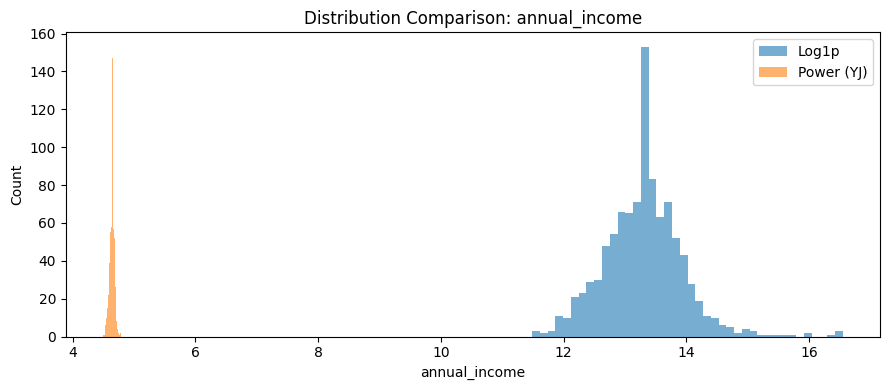

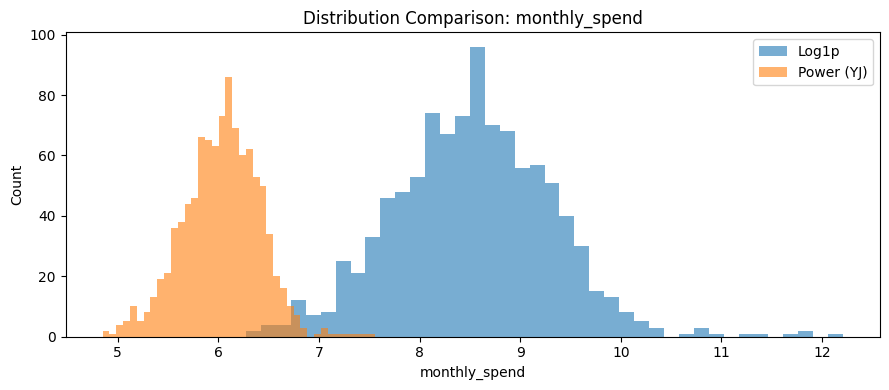

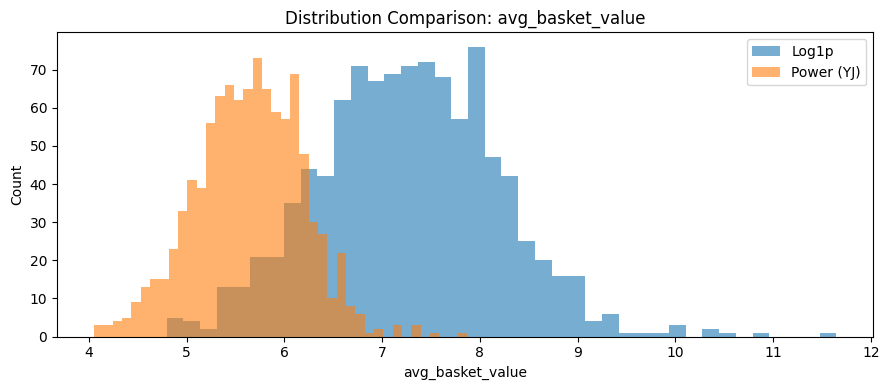

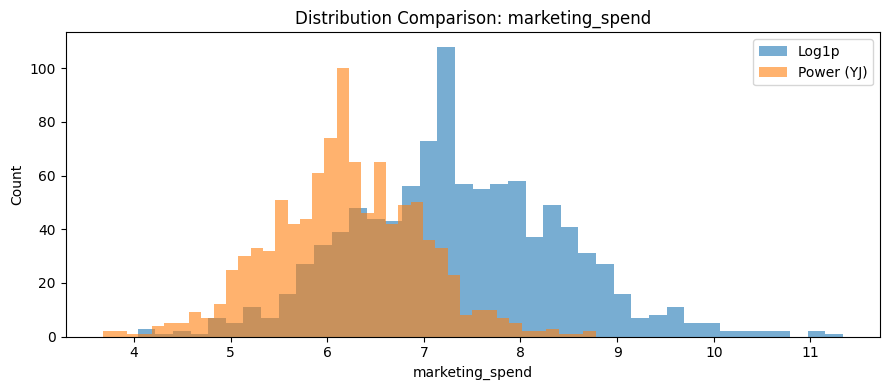

In [25]:
# -----------------------------
# 6) Visualization: Raw vs Log vs Power
# -----------------------------
def plot_distribution(col):
    plt.figure(figsize=(9, 4))

    #plt.hist(df_clean[col], bins=40, alpha=0.6, label="Raw")
    plt.hist(df_log[col], bins=40, alpha=0.6, label="Log1p")
    plt.hist(df_power[col], bins=40, alpha=0.6, label="Power (YJ)")

    plt.title(f"Distribution Comparison: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


for c in cols:
    plot_distribution(c)


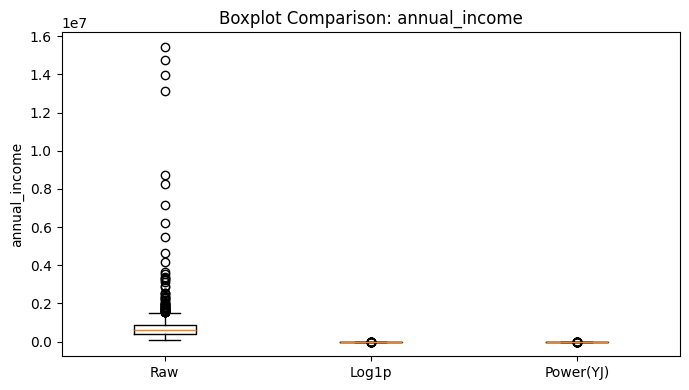

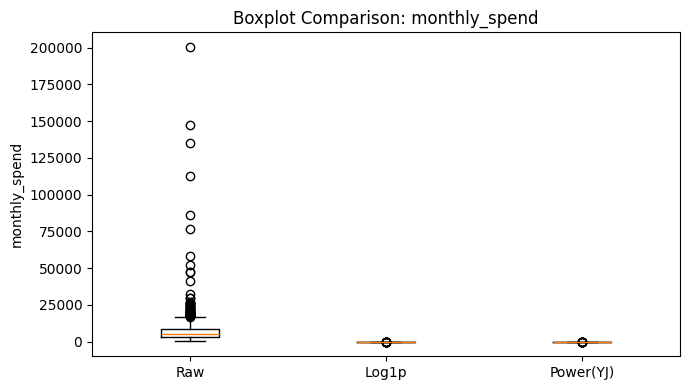

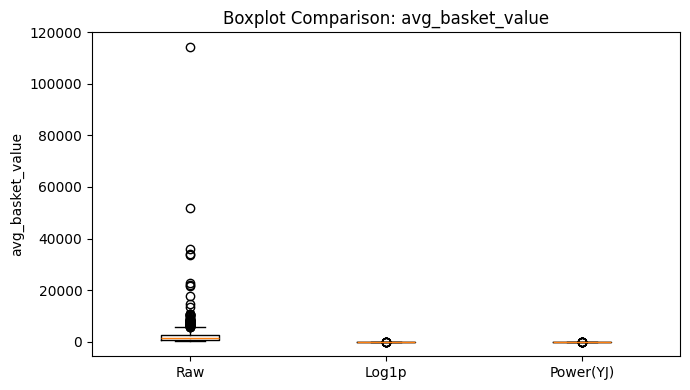

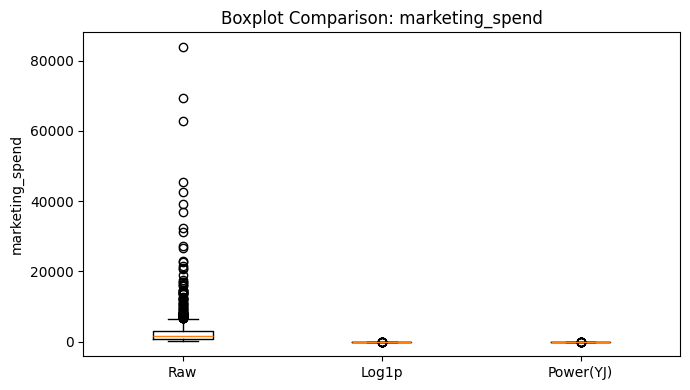

In [26]:
# -----------------------------
# 7) Boxplot comparison (outlier compression)
# -----------------------------
def boxplot_compare(col):
    plt.figure(figsize=(7, 4))
    plt.boxplot(
        [
            df_clean[col].values,
            df_log[col].values,
            df_power[col].values
        ],
        tick_labels=["Raw", "Log1p", "Power(YJ)"],
        showfliers=True
    )
    plt.title(f"Boxplot Comparison: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


for c in cols:
    boxplot_compare(c)


In [27]:
# -----------------------------
# 8) Summary table
# -----------------------------
summary = pd.DataFrame({
    "Mean (Raw)": df_clean[cols].mean(),
    "Std (Raw)": df_clean[cols].std(),
    "Std (Log1p)": df_log[cols].std(),
    "Std (Power)": df_power[cols].std()
}).round(2)

print("\nVariance Stabilization Comparison:")
print(summary)

print("\nPower transformation complete.")



Variance Stabilization Comparison:
                  Mean (Raw)   Std (Raw)  Std (Log1p)  Std (Power)
annual_income      786261.45  1091323.63         0.65         0.04
monthly_spend        7290.16    11297.55         0.79         0.38
avg_basket_value     2355.35     4813.31         0.92         0.54
marketing_spend      2999.70     5718.33         1.09         0.77

Power transformation complete.
